In [8]:
from cdflib import CDF
import pandas as pd
import matplotlib.pyplot as plt

cdf = CDF('../data/raw/AL1_ASW91_L2_TH2_20250619_UNP_9999_999999_V02.cdf')


In [9]:
info = cdf.cdf_info()
print("Zonal Variables:", info.zVariables)

Zonal Variables: ['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s15_mod', 'integrated_flux_s16_mod', 'integrated_flux_s17_mod', 'integrated_flux_s18_mod', 'integrated_flux_s19_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha2']


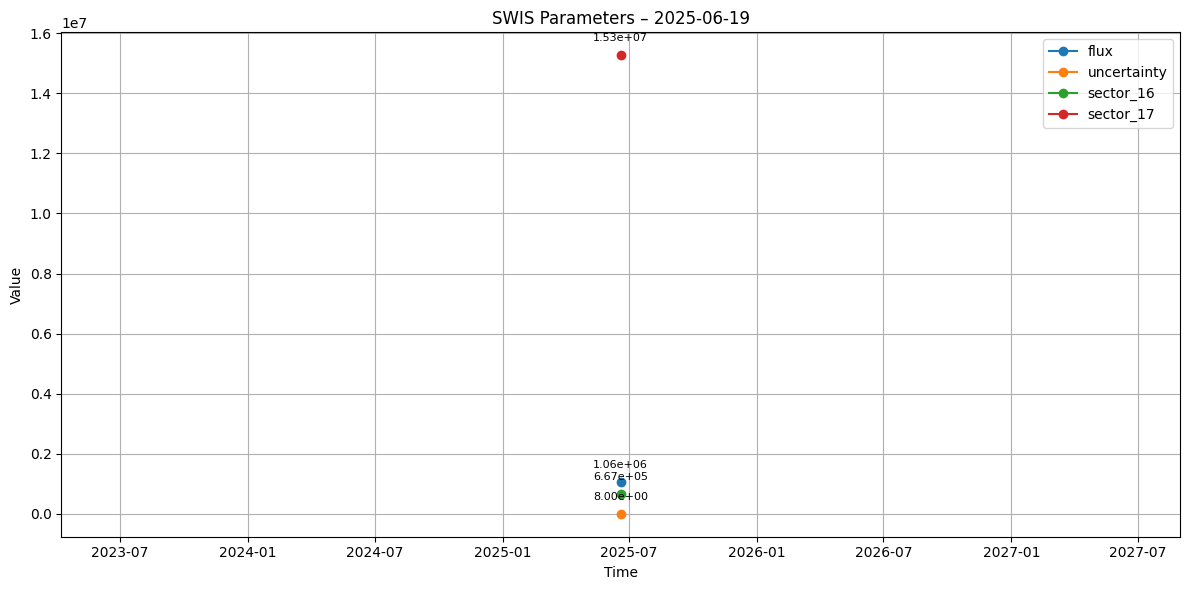

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Load Processed CSV ---
df = pd.read_csv('../data/processed/swis_20250619.csv', parse_dates=['time'])
df.set_index('time', inplace=True)
df['date'] = df.index.date

# --- Pick the Most Populated Date ---
top_day = df['date'].value_counts().idxmax()
df_day = df[df['date'] == top_day].drop(columns='date')

# --- Drop All-NaN Columns ---
df_day = df_day.dropna(axis=1, how='all')

# --- Plot with Markers and Value Annotations ---
plt.figure(figsize=(12, 6))
for col in df_day.columns:
    plt.plot(df_day.index, df_day[col], marker='o', label=col)
    for x, y in zip(df_day.index, df_day[col]):
        if pd.notna(y):
            plt.annotate(f'{y:.2e}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.title(f"SWIS Parameters – {top_day}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()

# --- Create folder and save plot ---
output_dir = '../plots'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(f'{output_dir}/swis_plot_{top_day}.png')
plt.show()
